# Resolução exercício aula 07 parte A

## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [0]:
!pip install deap

     |████████████████████████████████| 153kB 4.9MB/s 


In [0]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [0]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def LucroFabrica(individual):
  xA = individual[0]
  yA = individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = 15
  alcanceB = 12
  alcanceC = 3
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  clientesPorCidade = [7571, 5274, 11082, 11879, 9226, 7942, 6295, 4286, 8132, 11344]
  localizacaoCidades = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  soma_clientes = 0        
  for localizacaoCidade in localizacaoCidades:
    if((math.sqrt(((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  i = 0
  for cidadeAtendida in cidadesAtendidas:
    if(cidadeAtendida):
      soma_clientes = soma_clientes + clientesPorCidade[i]
    i = i + 1
  return soma_clientes

In [0]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(xA, yA, xB, yB, xC, yC):
  return True

In [0]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  while True: 
    v1 = attr_bool_function()
    v2 = attr_bool_function()
    v3 = attr_bool_function()
    v4 = attr_bool_function()
    v5 = attr_bool_function()
    v6 = attr_bool_function()
    if FuncaoDeRestricao(v1, v2, v3, v4, v5, v6):
      break
  cromossomo.append(v1)
  cromossomo.append(v2)
  cromossomo.append(v3)
  cromossomo.append(v4)
  cromossomo.append(v5)
  cromossomo.append(v6)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [0]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [0]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 2)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", LucroFabrica)
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxTwoPoint)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.15)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selBest)

## Chamada efetiva do GA para resolução

In [0]:
population = toolbox.population(n=40)
# quantidade de gerações
NGEN=35
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(max(fits))], max(fits)])
  bestInd.append(max(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", max(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(max(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", max(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )


Geracao:  0
[[2, 40, 48, 31, 15, 38], [32, 48, 32, 40, 3, 38], [46, 23, 47, 20, 41, 25], [48, 28, 41, 33, 27, 44], [33, 47, 10, 8, 5, 35], [5, 5, 9, 18, 2, 10], [1, 40, 8, 31, 16, 44], [17, 20, 33, 49, 39, 30], [21, 23, 48, 25, 14, 45], [12, 46, 47, 28, 50, 27], [10, 0, 46, 34, 45, 12], [4, 8, 43, 8, 35, 15], [42, 45, 19, 2, 45, 30], [36, 3, 21, 0, 32, 19], [36, 37, 5, 30, 1, 9], [44, 0, 49, 36, 1, 41], [16, 35, 18, 35, 38, 22], [16, 36, 2, 36, 16, 22], [46, 29, 21, 45, 47, 20], [40, 29, 14, 5, 43, 1], [20, 6, 0, 12, 7, 31], [0, 10, 19, 14, 47, 24], [5, 14, 18, 24, 9, 34], [1, 45, 30, 10, 34, 10], [41, 10, 0, 2, 43, 50], [33, 22, 40, 20, 2, 28], [41, 24, 5, 3, 21, 44], [38, 16, 48, 6, 8, 21], [41, 1, 32, 23, 29, 27], [40, 17, 7, 32, 26, 40], [3, 49, 29, 14, 27, 38], [28, 32, 46, 27, 21, 14], [6, 4, 26, 13, 0, 40], [13, 0, 25, 16, 43, 21], [24, 32, 45, 45, 6, 40], [29, 40, 44, 11, 11, 12], [29, 16, 33, 4, 2, 50], [37, 39, 15, 18, 22, 6], [20, 29, 40, 38, 19, 35], [35, 37, 27, 7, 0, 39]]

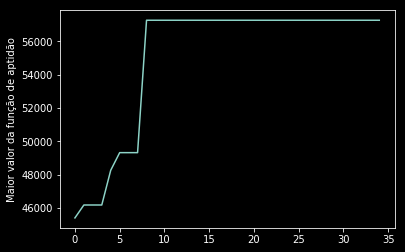

In [0]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Maior valor da função de aptidão')
plt.show()